In [15]:
import simpy
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

In [1]:
import simpy
import random

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'system_times': [],
            'arrival_times': [],
            'traffic_light_changes': []
        }
        self.last_arrival_time = 0

    def pedestrian(self, name):
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Pedestrian {name} is crossing the road at time {self.env.now}")

    def car(self, name):
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Car {name} is crossing the road at time {self.env.now}")

    def traffic_light(self):
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to red at time {self.env.now}")
            self.statistics['traffic_light_changes'].append(('red', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to yellow at time {self.env.now}")
            self.statistics['traffic_light_changes'].append(('yellow', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to green at time {self.env.now}")
            self.statistics['traffic_light_changes'].append(('green', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        pedestrian_id = 1
        car_id = 1

        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        self.env.process(self.traffic_light())
        self.env.run(until=simulation_time)

# Example usage
simulation = CrosswalkSimulation()
simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=200)

# Display statistics
avg_pedestrian_waiting_time = sum(simulation.statistics['pedestrian_waiting_times']) / len(simulation.statistics['pedestrian_waiting_times'])
avg_car_waiting_time = sum(simulation.statistics['car_waiting_times']) / len(simulation.statistics['car_waiting_times'])
avg_system_time = sum(simulation.statistics['system_times']) / len(simulation.statistics['system_times'])
avg_interarrival_time = simulation.last_arrival_time / len(simulation.statistics['arrival_times'])
utilization_ws = avg_system_time / simulation.env.now
waiting_time_wq = avg_system_time - avg_interarrival_time

print(f"\nSimulation Statistics:")
print(f"Average Pedestrian Waiting Time: {avg_pedestrian_waiting_time:.2f} seconds")
print(f"Average Car Waiting Time: {avg_car_waiting_time:.2f} seconds")
print(f"Average System Time: {avg_system_time:.2f} seconds")
print(f"Average Inter-arrival Time: {avg_interarrival_time:.2f} seconds")
print(f"Utilization (WS): {utilization_ws:.2%}")
print(f"Waiting Time in Queue (WQ): {waiting_time_wq:.2f} seconds")

# Display traffic light changes
print("\nTraffic Light Changes:")
for light, time in simulation.statistics['traffic_light_changes']:
    print(f"{light.capitalize()} light at time {time}")


Pedestrian 1 is crossing the road at time 0.6961372897625846
Car 1 is crossing the road at time 1.476725697448099
Pedestrian 2 is crossing the road at time 2.079445213210709
Car 2 is crossing the road at time 2.999220089022854
Pedestrian 3 is crossing the road at time 3.2371359068319068
Car 3 is crossing the road at time 4.187282912495038
Pedestrian 4 is crossing the road at time 4.70664991160514
Pedestrian 5 is crossing the road at time 5.20830343957878
Car 4 is crossing the road at time 5.896867158644769
Car 5 is crossing the road at time 6.560258788537455
Pedestrian 6 is crossing the road at time 6.837870433245059
Car 6 is crossing the road at time 7.106141488325556
Pedestrian 7 is crossing the road at time 7.2564465826182065
Pedestrian 8 is crossing the road at time 8.046193986569477
Car 7 is crossing the road at time 8.264581088218492
Pedestrian 9 is crossing the road at time 9.203842244638084
Car 8 is crossing the road at time 9.295206425752509
Pedestrian 10 is crossing the road 

In [52]:
import simpy
import random

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.cycle = {
            'red': 60,
            'yellow': 5,
            'green': 30
        }
        self.qPedXing = simpy.Resource(self.env, capacity=1)
        self.qCarXing = simpy.Resource(self.env, capacity=1)
        self.statistics = {
            'pedestrian_waiting_times': [],
            'car_waiting_times': [],
            'system_times': [],
            'arrival_times': [],
            'traffic_light_changes': []
        }
        self.last_arrival_time = 0

    def pedestrian(self, name):
        arrival_time = self.env.now
        with self.qPedXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['pedestrian_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Pedestrian {name} crossed the road at time {self.env.now:.2f}")

    def car(self, name):
        arrival_time = self.env.now
        with self.qCarXing.request() as request:
            yield request
            waiting_time = random.uniform(0.2, 2.0)
            yield self.env.timeout(waiting_time)
            crossing_time = self.env.now - arrival_time
            self.statistics['car_waiting_times'].append(waiting_time)
            self.statistics['system_times'].append(crossing_time)
            self.statistics['arrival_times'].append(arrival_time)
            print(f"Car {name} crossed the road at time {self.env.now:.2f}")

    def traffic_light(self):
        while True:
            yield self.env.timeout(self.cycle['red'])
            print(f"Traffic light changed to RED at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('RED', self.env.now))
            
            yield self.env.timeout(self.cycle['yellow'])
            print(f"Traffic light changed to YELLOW at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('YELLOW', self.env.now))

            yield self.env.timeout(self.cycle['green'])
            print(f"Traffic light changed to GREEN at time {self.env.now:.2f}")
            self.statistics['traffic_light_changes'].append(('GREEN', self.env.now))

    def run_simulation(self, num_cars, num_pedestrians, simulation_time):
        pedestrian_id = 1
        car_id = 1

        for _ in range(num_cars):
            self.env.process(self.car(car_id))
            car_id += 1

        for _ in range(num_pedestrians):
            self.env.process(self.pedestrian(pedestrian_id))
            pedestrian_id += 1

        self.env.process(self.traffic_light())
        self.env.run(until=simulation_time)
        
        return self.statistics


# Test Method
simulation = CrosswalkSimulation()
simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Display statistics
avg_pedestrian_waiting_time = sum(simulation.statistics['pedestrian_waiting_times']) / len(simulation.statistics['pedestrian_waiting_times'])
avg_car_waiting_time = sum(simulation.statistics['car_waiting_times']) / len(simulation.statistics['car_waiting_times'])
avg_system_time = sum(simulation.statistics['system_times']) / len(simulation.statistics['system_times'])
avg_interarrival_time = simulation.last_arrival_time / len(simulation.statistics['arrival_times'])
utilization_ws = avg_system_time / simulation.env.now
waiting_time_wq = avg_system_time - avg_interarrival_time
longest_car_wait = max(simulation.statistics['car_waiting_times'], default=0)
longest_pedestrian_wait = max(simulation.statistics['pedestrian_waiting_times'], default=0)

print(f"\nSimulation Statistics:")
print(f"Average Pedestrian Waiting Time: {avg_pedestrian_waiting_time:.2f} seconds")
print(f"Average Car Waiting Time: {avg_car_waiting_time:.2f} seconds")
print(f"Average System Time: {avg_system_time:.2f} seconds")
print(f"Average Inter-arrival Time: {avg_interarrival_time:.2f} seconds")
print(f"Utilization (WS): {utilization_ws:.2%}")
print(f"Waiting Time in Queue (WQ): {waiting_time_wq:.2f} seconds")
print("\nAdditional Statistics:")
print(f"Longest Car Wait: {longest_car_wait:.2f} seconds")
print(f"Longest Pedestrian Wait: {longest_pedestrian_wait:.2f} seconds")


# Display traffic light changes in ascending order
print("\nTraffic Light Changes (Ascending Order):")
for light, time in sorted(simulation.statistics['traffic_light_changes'], key=lambda x: x[1]):
    print(f"{light} light at time {time:.2f}")


Car 1 crossed the road at time 0.68
Car 2 crossed the road at time 1.75
Pedestrian 1 crossed the road at time 1.82
Car 3 crossed the road at time 2.01
Pedestrian 2 crossed the road at time 2.95
Car 4 crossed the road at time 3.43
Car 5 crossed the road at time 3.90
Car 6 crossed the road at time 4.11
Pedestrian 3 crossed the road at time 4.51
Pedestrian 4 crossed the road at time 5.09
Car 7 crossed the road at time 5.93
Pedestrian 5 crossed the road at time 6.29
Pedestrian 6 crossed the road at time 6.55
Car 8 crossed the road at time 6.76
Car 9 crossed the road at time 7.43
Pedestrian 7 crossed the road at time 7.93
Car 10 crossed the road at time 8.62
Pedestrian 8 crossed the road at time 9.18
Car 11 crossed the road at time 9.65
Pedestrian 9 crossed the road at time 9.94
Car 12 crossed the road at time 10.09
Pedestrian 10 crossed the road at time 10.90
Car 13 crossed the road at time 11.30
Pedestrian 11 crossed the road at time 11.81
Pedestrian 12 crossed the road at time 12.25
Car 

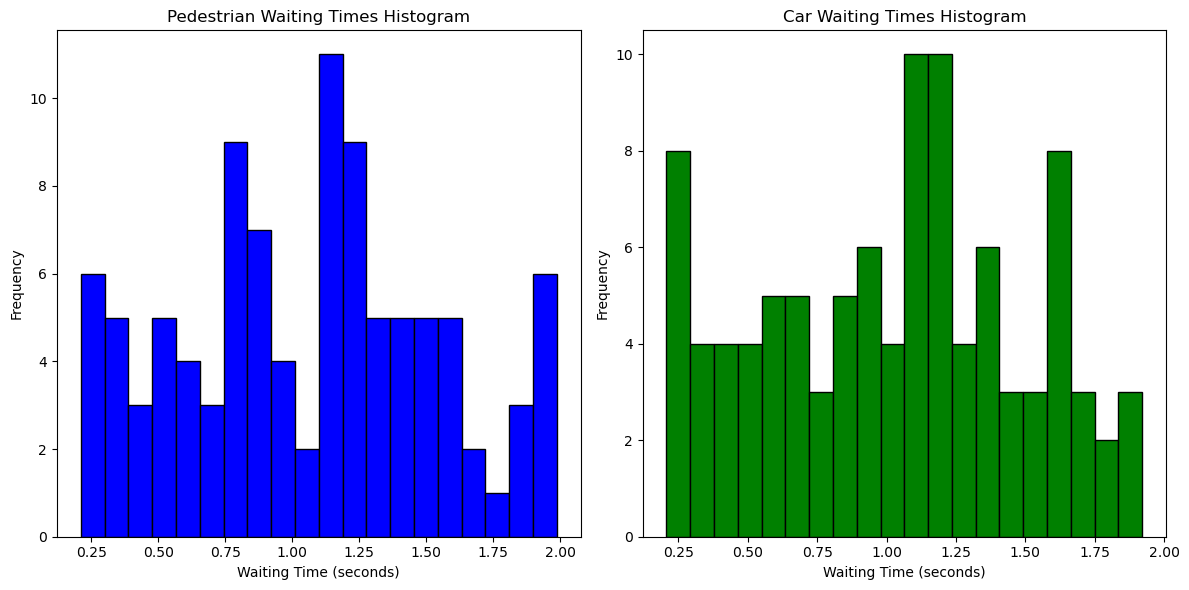

In [53]:
# Plot histograms
plt.figure(figsize=(12, 6))

        # Histogram for pedestrian waiting times
plt.subplot(1, 2, 1)
plt.hist(simulation.statistics['pedestrian_waiting_times'], bins=20, color='blue', edgecolor='black')
plt.title('Pedestrian Waiting Times Histogram')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Frequency')

        # Histogram for car waiting times
plt.subplot(1, 2, 2)
plt.hist(simulation.statistics['car_waiting_times'], bins=20, color='green', edgecolor='black')
plt.title('Car Waiting Times Histogram')
plt.xlabel('Waiting Time (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

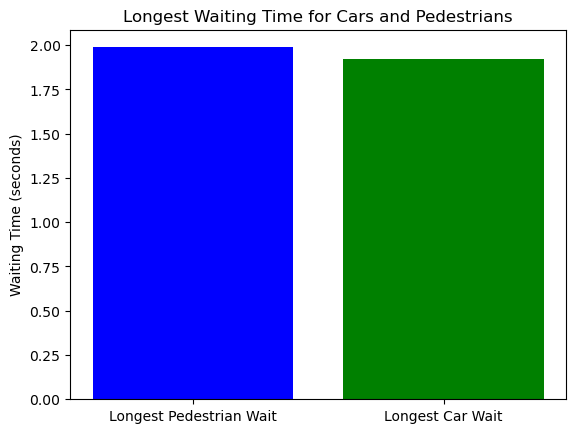

In [54]:
# Plot bar graph for longest waiting times
labels = ['Longest Pedestrian Wait', 'Longest Car Wait']
values = [longest_pedestrian_wait, longest_car_wait]

plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Waiting Time (seconds)')
plt.title('Longest Waiting Time for Cars and Pedestrians')
plt.show()

Car 1 crossed the road at time 0.25
Pedestrian 1 crossed the road at time 0.55
Car 2 crossed the road at time 1.99
Pedestrian 2 crossed the road at time 2.08
Pedestrian 3 crossed the road at time 3.74
Car 3 crossed the road at time 3.91
Car 4 crossed the road at time 4.35
Pedestrian 4 crossed the road at time 4.52
Car 5 crossed the road at time 5.54
Pedestrian 5 crossed the road at time 6.29
Car 6 crossed the road at time 7.07
Pedestrian 6 crossed the road at time 7.88
Car 7 crossed the road at time 8.65
Pedestrian 7 crossed the road at time 9.18
Car 8 crossed the road at time 9.52
Car 9 crossed the road at time 10.92
Pedestrian 8 crossed the road at time 10.99
Car 10 crossed the road at time 11.73
Pedestrian 9 crossed the road at time 11.97
Pedestrian 10 crossed the road at time 12.39
Car 11 crossed the road at time 12.45
Car 12 crossed the road at time 12.78
Pedestrian 11 crossed the road at time 13.30
Car 13 crossed the road at time 14.01
Car 14 crossed the road at time 14.52
Pedest

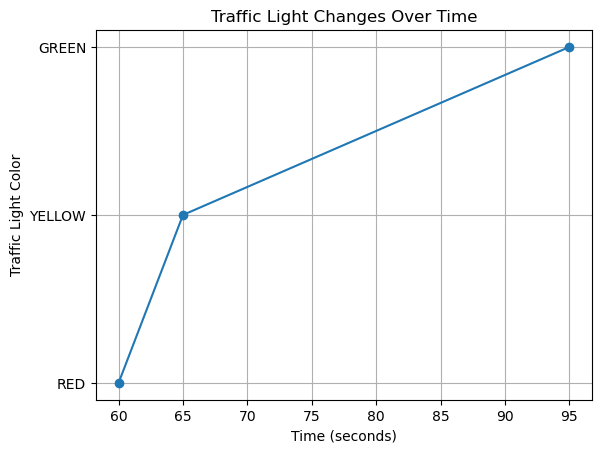

In [55]:
#Create an instance of the CrosswalkSimulation
simulation = CrosswalkSimulation()

# Run the simulation to obtain statistics
statistics = simulation.run_simulation(num_cars=100, num_pedestrians=100, simulation_time=120)

# Plot line graph for traffic light changes
light_colors, light_times = zip(*statistics['traffic_light_changes'])

plt.plot(light_times, light_colors, marker='o')
plt.yticks(['RED', 'YELLOW', 'GREEN'])
plt.xlabel('Time (seconds)')
plt.ylabel('Traffic Light Color')
plt.title('Traffic Light Changes Over Time')
plt.grid(True)
plt.show()

import simpy
import random

class Signal:
    RED = 0
    YELLOW = 1
    GREEN = 2

class CrosswalkSimulation:
    def __init__(self):
        self.env = simpy.Environment()
        self.qPedArr = simpy.Store(self.env)
        self.qPedXing = simpy.Store(self.env)
        self.qPedXed = simpy.Store(self.env)
        self.qPedLeave = simpy.Store(self.env)

        self.qCarArr = simpy.Store(self.env)
        self.qCarXing = simpy.Store(self.env)
        self.qCarXed = simpy.Store(self.env)

        self.walkToXing = (60, 120)
        self.walkAcross = (10, 20)
        self.walkAway = (120, 180)

        self.driveToXing = (5, 6)
        self.driveAway = (10, 12)

        self.pedestrianArrivalInterval = 60 / 10  # 10/min
        self.carArrivalInterval = 60 / 6  # 6/min

        self.cycle = {
            'red': 20,
            'yellow': 10,
            'green': 30,
        }
        self.light = Signal.RED

    def pedestrian(self, name):
        arrival_time = self.env.now

        # Walk to crosswalk
        walk_time = random.uniform(*self.walkToXing)
        yield self.env.timeout(walk_time)
        self.qPedArr.put((name, arrival_time))

        # Enter pedestrian crosswalk
        yield self.qPedXing.put((name, self.env.now))

        # Wait for green light
        while self.light != Signal.GREEN:
            yield self.env.timeout(1)

        # Leave crossing
        yield self.qPedXing.get()
        walk_across_time = random.uniform(*self.walkAcross)
        yield self.env.timeout(walk_across_time)
        yield self.qPedXed.put((name, self.env.now))

        # Walk away
        walk_away_time = random.uniform(*self.walkAway)
        yield self.env.timeout(walk_away_time)
        yield self.qPedLeave.put((name, self.env.now))

    def car(self, name):
        # Drive to crosswalk
        drive_time = random.uniform(*self.driveToXing)
        yield self.env.timeout(drive_time)
        self.qCarArr.put((name, self.env.now))

        # Enter crosswalk
        yield self.qCarXing.put((name, self.env.now))

        # Wait until red for pedestrians
        while self.light != Signal.RED:
            yield self.env.timeout(1)

        # Leave crosswalk
        yield self.qCarXing.get()
        drive_away_time = random.uniform(*self.driveAway)
        yield self.env.timeout(drive_away_time)
        yield self.qCarXed.put((name, self.env.now))

    def traffic_light(self):
        while True:
            # Turn green to allow pedestrians to cross
            self.set_light(Signal.GREEN)
            yield self.env.timeout(self.cycle['green'])

            # Turn yellow to clear pedestrians
            self.set_light(Signal.YELLOW)
            yield self.env.timeout(self.cycle['yellow'])

            # Turn red to allow cars to cross
            self.set_light(Signal.RED)
            yield self.env.timeout(self.cycle['red'])

    def set_light(self, value):
        self.light = value

    def run_simulation(self, num_pedestrians, num_cars, simulation_time):
        # Create pedestrian entities
        for i in range(1, num_pedestrians + 1):
            self.env.process(self.pedestrian(i))

        # Create car entities
        for i in range(1, num_cars + 1):
            self.env.process(self.car(i))

        # Start traffic light process
        self.env.process(self.traffic_light())

        # Run the simulation
        self.env.run(until=simulation_time)

# Example usage
simulation = CrosswalkSimulation()
simulation.run_simulation(num_pedestrians=5, num_cars=5, simulation_time=200)


In [63]:
# Extract data for plotting
pedestrian_crossings = statistics['pedestrian_crossings']
car_crossings = statistics['car_crossings']

# Plot line graphs for pedestrian and car crossings against time
ped_times = [time for _, time in pedestrian_crossings]
car_times = [time for _, time in car_crossings]

plt.plot2(ped_times, [1] * len(ped_times), 'ro', label='Pedestrian Crossings')
plt.plot2(car_times, [2] * len(car_times), 'bo', label='Car Crossings')

plt.yticks2([1, 2], ['Pedestrian', 'Car'])
plt.xlabel2('Time (seconds)')
plt.ylabel2('Crosswalk Crossings')
plt.title2('Pedestrian and Car Crossings Over Time')
plt.legend()
plt.grid(True)
plt.show()

TypeError: 'NoneType' object is not subscriptable